# Problem description

This directory contains data to train a model to predict the function of protein domains, based
on the PFam dataset.

Domains are functional sub-parts of proteins; much like images in ImageNet are pre segmented to
contain exactly one object class, this data is presegmented to contain exactly and only one
domain.

The purpose of the dataset is to repose the PFam seed dataset as a multiclass classification
machine learning task.

**The task is:** given the amino acid sequence of the protein domain, predict which class it belongs
to. There are about 1 million training examples, and 18,000 output classes.

In [1]:
import os
import pandas as pd #for file handling
import matplotlib.pyplot as plt # plotting
import seaborn as sns # fancy plotting
import numpy as np # linear algebra
import gc # for memory cleaning


data_path = '../input/pfam-seed-random-split/random_split' #Make sure to modify to your location
print('Available data', os.listdir(data_path))

def read_data(partition):
  data = []
  for fn in os.listdir(os.path.join(data_path, partition)):
    with open(os.path.join(data_path, partition, fn)) as f:
      data.append(pd.read_csv(f, index_col=None))
  return pd.concat(data)

Available data ['random_split', 'test', 'train', 'dev']


# Initial data exploration

In [2]:
"Reading in data"
df_train = read_data('train')
df_val = read_data('dev')
df_test = read_data('test')
"checking out the headers"
df_test.head()

,family_id,sequence_name,family_accession,aligned_sequence,sequence
0,Ribosomal_L28,G2PE79_STRVO/4-62,PF00830.19,.HCQLTG.RQPGFGHH.....I....S.HS...............H...,HCQLTGRQPGFGHHISHSHRRTKRRFDPNIQHKRYWLPSEGRHIRL...
1,DUF2073,A3CWG8_METMJ/15-119,PF09846.9,LERLTAMEKIRLILDDVMEGNIVILEKGLAPDEQSKLIEITMREIA...,LERLTAMEKIRLILDDVMEGNIVILEKGLAPDEQSKLIEITMREIA...
2,UPF0052,B8HTP5_CYAP4/137-423,PF01933.18,IVAIGGGTGLSTLL..............RGLKEYS..............,IVAIGGGTGLSTLLRGLKEYSANITAIVTVADDGGSSGRLRREIGV...
3,SBD_N,Q12HD1_POLSJ/12-248,PF07005.11,LAYYGDDFTGSTDVMEAFSA.....AGV........PTVLF.LRP....,LAYYGDDFTGSTDVMEAFSAAGVPTVLFLRPPTADWLKRFPEVRCV...
4,LepA_C,D7G0L8_ECTSI/605-711,PF06421.12,INGEDAPPLSTVCHRDQAHQRGKVLTEKLKQLIPRQMFRVPIQACI...,INGEDAPPLSTVCHRDQAHQRGKVLTEKLKQLIPRQMFRVPIQACI...


In [3]:
"Checking out the headers"

df_train.head()


,family_id,sequence_name,family_accession,aligned_sequence,sequence
0,YfcL,Q5E3V0_VIBF1/3-85,PF08891.11,IEFEEKMLELIDARIESASD.DELFAGGYLRGHISLSVANCEEQGI...,IEFEEKMLELIDARIESASDDELFAGGYLRGHISLSVANCEEQGIN...
1,Somatomedin_B,F2UGX0_SALR5/258-297,PF01033.17,TTCAVRG...C..........SDINL......NQNCQCD.PSC.YS...,TTCAVRGCSDINLNQNCQCDPSCYSFGDCCADFAAVCESS
2,Surp,K7J3U9_NASVI/11-59,PF01805.20,RNIIDKLAQFVA..R..NG....P........EFEQMT.KNK.......,RNIIDKLAQFVARNGPEFEQMTKNKQKDNPKFSFLFGGEYFNYYQYKVT
3,DUF1230,E1ZG39_CHLVA/70-212,PF06799.11,.AVPREQRPVNELQQLKDTPLLAW......ATLDL..PQYAQRL.....,AVPREQRPVNELQQLKDTPLLAWATLDLPQYAQRLLILYGGVFLLL...
4,SRCR_2,F1NY88_CHICK/145-241,PF15494.6,GPNFILEVYSPVSQTWYPVCQDDWTDDFGKIACEDMGYN....VDT...,GPNFILEVYSPVSQTWYPVCQDDWTDDFGKIACEDMGYNVDTYYYS...


In [4]:
"Checking out the headers"

df_val.head()


,family_id,sequence_name,family_accession,aligned_sequence,sequence
0,Ank,Y502_TREPA/243-275,PF00023.30,NGQTALV..L................A...............V......,NGQTALVLAVGRKDHVLIRLLMDHGANPYLEDK
1,LrgB,R5LI56_9SPIR/16-230,PF04172.16,TLIAYIIS....YAIYIK.T.K...LPILTPLVTSAILVGFSL......,TLIAYIISYAIYIKTKLPILTPLVTSAILVGFSLYFMNIPYSVYNE...
2,Lzipper-MIP1,W1P7E2_AMBTC/726-807,PF14389.6,ALHERRLALE.....QDVARLQEQLQKERDLRALLE.AGL.........,ALHERRLALEQDVARLQEQLQKERDLRALLEAGLNMPSEGYAISSS...
3,DUF2922,A0Q3K1_CLONN/3-69,PF11148.8,KLLVMNFITNK.G..KKMNIKVKDIKPD......IEEETVAEVMNA...,KLLVMNFITNKGKKMNIKVKDIKPDIEEETVAEVMNAIIDKNVFLS...
4,2OG-Fe_Oxy_2,A5VC55_SPHWW/45-237,PF10014.9,AGSWERLGDDRFMADGGR......YRRRRHAVF.......AVGR.....,AGSWERLGDDRFMADGGRYRRRRHAVFAVGRDVVRKPHQPHYQSRD...


In [5]:
"The set split"
N_test=len(df_test)
N_train=len(df_train)
N_val=len(df_val)
N_tot=N_test+N_train+N_val
print('Dataset "%s" has %d sequences, fraction %f ' % ('train', N_train, N_train/N_tot))
print('Dataset "%s" has %d sequences, fraction %f' % ('test', N_test, N_test/N_tot))
print('Dataset "%s" has %d sequences, fraction %f ' % ('dev', N_val, N_val/N_tot))




Dataset "train" has 1086741 sequences, fraction 0.811556 
Dataset "test" has 126171 sequences, fraction 0.094222
Dataset "dev" has 126171 sequences, fraction 0.094222 


**Questions for initial exploration of data**
1. Are there duplicates? 

In this data volume, a small amount of duplicates does not hurt that much

2. How many unique pfams there are? How is the number of samples distributed and are there rare families? 

If there are families with only few examples, they are hard to predict. If there are few families where overwhelming amount of examples, the prediction will be weighted towards them and data balancing or some weighting scheme is needed. Number of classes to predict implies the model complexity.

3. Sequence information content. What is the lenght range of sequences? How common are the rare amino acids & unknowns. Do their precence determine the pfam?

If considered lenght can be reduced it helps with memory & model size. If number of considered aminos can be reduced it helps with data volume too. It might also be fun to explore whether the sequence lenght ranges correlate on the amount examples from the family, but that is likely less crucial for the problem in hand.


In [6]:
"See if some sequences have full sequence name duplicates"
print(len(df_train.sequence_name.value_counts())-N_train)

"See if some sequences have full unaligned sequence duplicates"
sum(df_train.sequence.value_counts().loc[lambda x : x>1])

0


659

In [7]:
"There are some, although not significant amount, lets see how they differ"

print(df_train.loc[df_train['sequence']=='GLFRFSLSDFCNKSVNHICGSVDDEANVWHSRLCHINFGLMSRLSSMCLIPKFSIVKGSKCHSCVQSKQ'])

             family_id         sequence_name family_accession  \
10372  gag_pre-integrs  Q8H7V4_ORYSJ/406-474        PF13976.6   
7689   gag_pre-integrs  B9GAB8_ORYSJ/146-214        PF13976.6   
4713   gag_pre-integrs  Q75IE4_ORYSJ/406-474        PF13976.6   
994    gag_pre-integrs  Q10JD1_ORYSJ/622-690        PF13976.6   
4699   gag_pre-integrs  Q2QXX1_ORYSJ/199-267        PF13976.6   
956    gag_pre-integrs  Q6AUM4_ORYSJ/820-888        PF13976.6   
6852   gag_pre-integrs  Q6AT91_ORYSJ/406-474        PF13976.6   
5450   gag_pre-integrs  Q10H09_ORYSJ/483-551        PF13976.6   
2045   gag_pre-integrs  Q7XP54_ORYSJ/406-474        PF13976.6   
709    gag_pre-integrs  Q2QSL1_ORYSJ/406-474        PF13976.6   
6154   gag_pre-integrs  Q10CN4_ORYSJ/406-474        PF13976.6   
8541   gag_pre-integrs  Q53KA0_ORYSJ/406-474        PF13976.6   
12352  gag_pre-integrs  Q6AUM3_ORYSJ/406-474        PF13976.6   
12095  gag_pre-integrs  Q2QP37_ORYSJ/367-435        PF13976.6   
10208  gag_pre-integrs  Q

In [8]:
"The number of unique families"
print('Unique pfams in Train: ', len(np.unique(df_train['family_accession'].values)))
print('Unique pfams in Val: ', len(np.unique(df_val['family_accession'].values)))
print('Unique pfams in Test: ', len(np.unique(df_test['family_accession'].values)))


Unique pfams in Train:  17929
Unique pfams in Val:  13071
Unique pfams in Test:  13071


It seems that there are at least ~5k pfams in the training set which are not in the other two datasets

In [9]:
"Are there rare families? Printing here the families smaller than 100."
df_train.family_accession.value_counts().loc[lambda x : x<100]

PF08837.11    99
PF01783.23    99
PF13874.6     99
PF17745.1     99
PF13664.6     99
              ..
PF18355.1      1
PF17531.2      1
PF03503.13     1
PF17609.2      1
PF17632.2      1
Name: family_accession, Length: 15161, dtype: int64

180

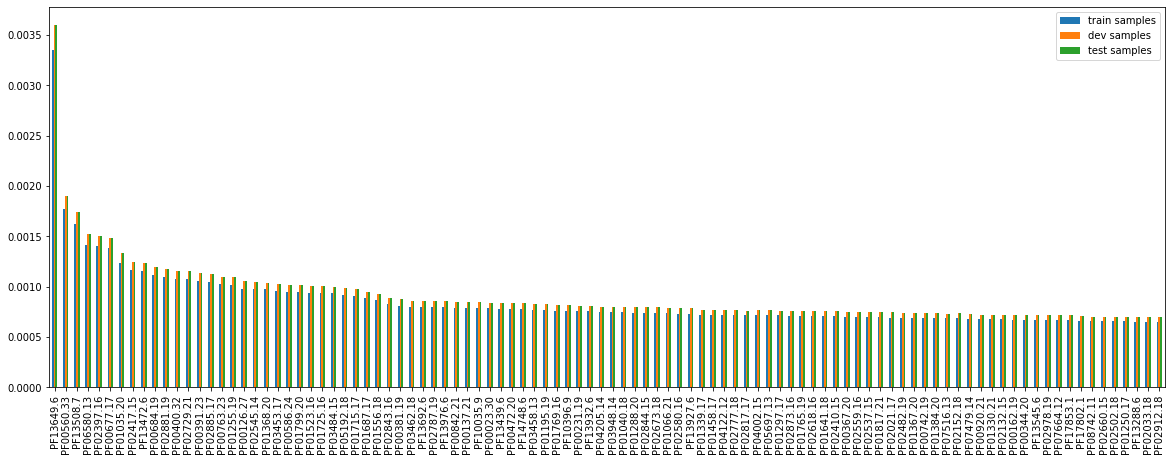

In [10]:
"Lets visualize the percentages data in common pfams in each dataset"

"Selecting range of visualisation, here example for 100 most common pfams in train"
labels = df_train.family_accession.value_counts()[0:100]

"Grabbing the data for those labels"
mask = df_train.family_accession.isin(labels.index.values)
train_sm = df_train.loc[mask,:]

mask = df_val.family_accession.isin(labels.index.values)
val_sm = df_val.loc[mask,:]

mask = df_test.family_accession.isin(labels.index.values)
test_sm = df_test.loc[mask,:]


"plotting the percentages of samples within the selected pfams for each dataset"
Counts = pd.concat([pd.DataFrame(train_sm.family_accession.value_counts()/N_train), 
           pd.DataFrame(val_sm.family_accession.value_counts()/N_val), 
           pd.DataFrame(test_sm.family_accession.value_counts()/N_test)], 
          axis=1)
Counts.columns = ['train samples', 'dev samples', 'test samples']
Counts.plot.bar(figsize = (20,7), fontsize = 10)

#memory cleaning

del test_sm, train_sm, val_sm
gc.collect()


Most common pfams seem to be present in all datasets and have similar sample distribution. The most common pfam has almost twice as many samples as in the next most common. Other than that the distribution is quite flat locally.

In [11]:
"Lets explore if the rare amino acids and unknowns are distributed in families"
def get_amino_freq(df, aminoname):
    amino_labels=df_train[df_train['sequence'].str.contains(aminoname)].family_accession.value_counts()
    mask = df_train.family_accession.isin(amino_labels.index.values)
    train_amino_counts = df_train.loc[mask,:].family_accession.value_counts()
    amino_data=pd.concat( 
               [pd.DataFrame(amino_labels), 
               pd.DataFrame(train_amino_counts)], 
              axis=1)
    amino_data.columns = ['containing_amino', 'family_freq']
    amino_data['amino_containg_fraction']= amino_data.apply(lambda row: row['containing_amino']/row['family_freq'], axis=1)
    return amino_data
"printing the out the amino containing how many of the sequences if pfam contain the amino, the pfam sample size, and fraction of those containing the amino"
get_amino_freq(df_test, 'Z')                                                                                                                                                                                                 

,containing_amino,family_freq,amino_containg_fraction
PF00042.22,2,59,0.033898
PF04583.12,1,8,0.125000


In [12]:
get_amino_freq(df_test, 'X')

,containing_amino,family_freq,amino_containg_fraction
PF13976.6,80,867,0.092272
PF08705.11,11,104,0.105769
PF06022.11,10,441,0.022676
PF01384.20,5,745,0.006711
PF00141.23,5,128,0.039062
...,...,...,...
PF00579.25,1,31,0.032258
PF05820.11,1,6,0.166667
PF11709.8,1,58,0.017241
PF02676.14,1,119,0.008403


In [13]:
get_amino_freq(df_test, 'U')

,containing_amino,family_freq,amino_containg_fraction
PF02662.16,27,188,0.143617
PF10262.9,20,211,0.094787
PF04723.14,12,13,0.923077
PF08806.11,5,32,0.156250
PF04593.14,3,3,1.000000
PF00837.17,3,3,1.000000
PF00255.19,3,8,0.375000
PF00578.21,2,78,0.025641
PF01641.18,2,769,0.002601
PF04592.14,1,9,0.111111


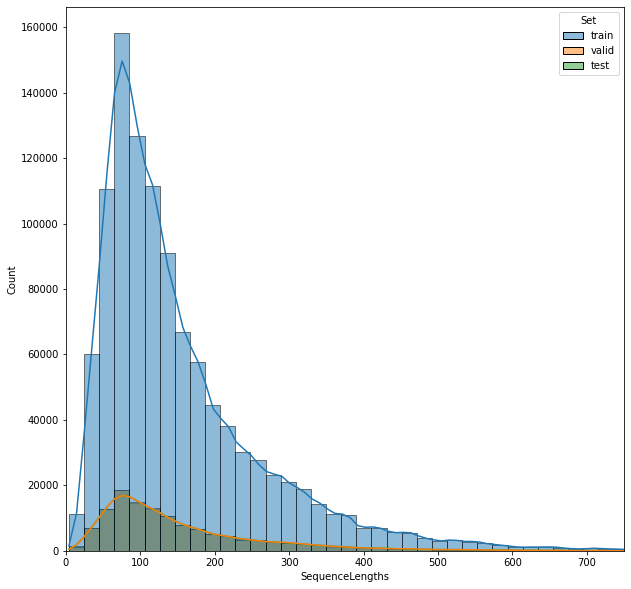

In [14]:
"Taking a look at the lenght distribution within the sets"

def plot_lengths(df_train, df_val, df_test, xlimit):
    
    #xlimit tunes the range in plot

    seqlen_train = list(zip(df_train.sequence.apply(len).to_list(), ['train']*len(df_train)))
    seqlen_val = list(zip(df_val.sequence.apply(len).to_list(), ['valid']*len(df_val)))
    seqlen_test = list(zip(df_test.sequence.apply(len).to_list(), ['test']*len(df_test)))
    df_seqlens = pd.DataFrame(data=seqlen_train+seqlen_val+seqlen_test, columns=['SequenceLengths','Set'])
    plt.figure(figsize=(10,10))
    sns.histplot(data=df_seqlens, x="SequenceLengths", hue="Set", kde=True, bins=100)
    plt.xlim(0,xlimit)
    
plot_lengths(df_train, df_val, df_test, 750)    

Lenght distributions are similar across data sets. They peack around 100 amino acids and the distribution has a long tail in the larger sequence side, which can probably be cut off.

**Summary from data exploration:**
* Quite a lot of data, using eg. neural network seems feasible
* Sequence lenght distribution similar among data sets, concatenating around sequence length 200-400 would easily capture most data.
* Distribution of samples among pfams similar in all the sets, however, there are some pfams which are only present in the training set.
* Some duplicates were found, but not significant amount
* Quite a few classes (pfams) to predict, indicates the need for a complex model or data reduction to get good results.
* Quite a few pfams with only few examples in train. These will be harder to predict with eg. a neural network which usually needs ~500 examples to do well
* At least one very common pfam in train: PF13649.6 has almost 2 times more examples as the next most common. Data balancing might be beneficial for fine tuning but since the number of classes is large and distribution mostly flat without data balancing will likely work alright too.
* The rare amino acids seem significant only for pfams with few samples. We can pool them together unknown (X) to reduce the dimensionality of data encoding

# Approach: light version of state-of-the-art resnets

* According to Bileschi et al, Nature Biotechnology 40, 932–937 (2022), (convolution) neural networks seem to do well on classifying the pfams of unaligned sequences. This makes sense cause convolution does "feature extraction" from the sequenes.
* To keep the solution runnable on a worksheet, I'll try a "light" version of the NN from Bileschi et al, and see how it does 
* I will only try to classify to the most common pfams first. This will allow for simpler network structure, reduce memory requirements, but still hopefully provide some data coverage

**Data reduction**

In [15]:
"Exploring the number of classes vs data coverage vs size of the smallest fpam"

"Check the function printout to see if the pfam numbers are the same in all sets. If not, there are some in train that are not present in the others"

def grab_classrange(df_train, df_val, df_test, N_begin, N_end):
    labels = df_train.family_accession.value_counts()[N_begin:N_end]

    #Grabbing the data for those labels"
    mask = df_train.family_accession.isin(labels.index.values)
    train_part = df_train.loc[mask,:]
    mask = df_val.family_accession.isin(labels.index.values)
    val_part = df_val.loc[mask,:]
    mask = df_test.family_accession.isin(labels.index.values)
    test_part = df_test.loc[mask,:]

    #See if all selected labels are in dev and test sets too, print out data coverage and size of the smallest pfam considered"

    print('Number of classes', N_end-N_begin )
    print('Unique pfams in Train %d, data coverage in Train %f, number of training samples %d' %(len(np.unique(train_part['family_accession'].values)),len(train_part)/N_train, len(train_part))) 
    print('Unique pfams in Val %d, data coverage in Val %f ' %(len(np.unique(val_part['family_accession'].values)),len(val_part)/N_val))
    print('Unique pfams in Test %d' %(len(np.unique(test_part['family_accession'].values))))
    print('The largest considered pfam size is', labels[0] )
    print('The smallest considered pfam size is', labels[-1] )
    
    return train_part, val_part, test_part, N_end-N_begin

#Tune the data range selected here, 0 is the most common pfam in train. "
N_begin=0
N_end=225

train_part, val_part, test_part, N_classes=grab_classrange(df_train, df_val, df_test, N_begin, N_end)


Number of classes 225
Unique pfams in Train 225, data coverage in Train 0.157056, number of training samples 170679
Unique pfams in Val 225, data coverage in Val 0.168097 
Unique pfams in Test 225
The largest considered pfam size is 3637
The smallest considered pfam size is 566


In [16]:
"Checking the duplicates again"
np.sum(train_part.sequence.value_counts().loc[lambda x : x>1])



246

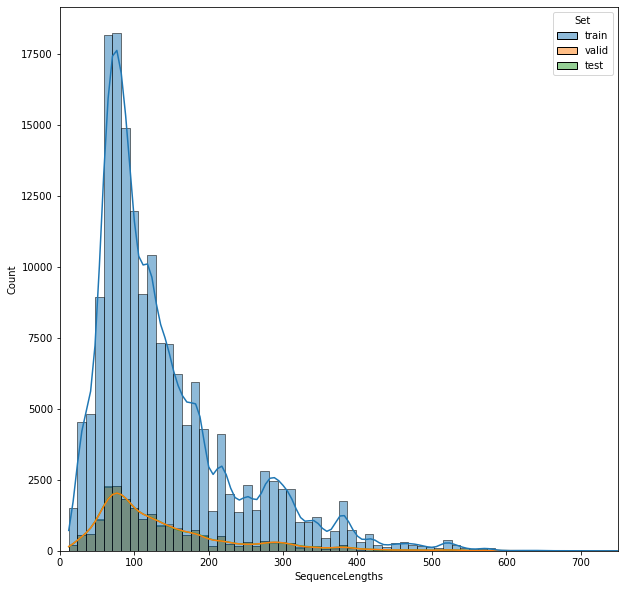

In [17]:
"Checking the length distribution in the new dataset"
plot_lengths(train_part, val_part, test_part, 750) 

The mode of the distribution is still around 100 and cutting the sequence lenght around 200-300 will give some coverage.

To fine tune, I could remove the duplicates and downsample the the training data so that there is only the same amount in every class. This would make sure that the algorithm does not merely learn the relative probabilities of the classes. Optionally, one could manipulate the family weights in training.

However, lets make an attempt without data balancing to keep it simple. Since the distribution of pfam sizes seemed locally flat this should work alright.

**Data encodings**

In [18]:
"data encodings: input"
"Based on the exploration above, few rare amino acids are in the pfams above the size we are exploring here. Encoding them to unknown should not harm the performance much"

def int_encoding(data):
    
  amino_dict={'A': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12, 'P': 13, 'Q': 14, 'R': 15, 'S': 16, 'T': 17, 'V': 18, 'W': 19, 'Y': 20}  
    
  """
  
  Transforms the 20 aminos in dictionnary above to int codes. IMPORTANT: X, U, B, O, Z (and everything not in the dictionary) code to 0
  
  """
  
  encode_list = []
  for row in data['sequence'].values:
    row_encode = []
    for code in row:
      row_encode.append(amino_dict.get(code, 0))
    encode_list.append(np.array(row_encode))
  
  return encode_list
  
train_encd = int_encoding(train_part) 
val_encd = int_encoding(val_part) 
test_encd = int_encoding(test_part) 


print(train_encd[0])

[ 4  9 13 10 20 16  5  7 12  7  8  1  1 18  9  1  8 17 19 16 13  7 14 15
  6  8 10  1 16  6  6  6 17  1  3 15 17  8  9 10 19 12]


In [19]:
"Limiting sequence lenghts and padding at the end: Maximun sequence lenght (seq_max_l) chosen based on the lenght distribution plot"
#code reference: https://github.com/ronakvijay/Protein_Sequence_Classification/blob/master/Pfam_protein_sequence_classification.ipynb
from tensorflow.keras.preprocessing.sequence import pad_sequences

seq_max_l = 225
padtype='post'
trunctype='post'

train_pad = pad_sequences(train_encd, maxlen=seq_max_l, padding=padtype, truncating=trunctype)
val_pad = pad_sequences(val_encd, maxlen=seq_max_l, padding=padtype, truncating=trunctype)
test_pad = pad_sequences(test_encd, maxlen=seq_max_l, padding=padtype, truncating=trunctype)

print(train_pad.shape, val_pad.shape, test_pad.shape)


"One hot encoding the inputs. The NN might work ok without and this increases the dimensionality"
from tensorflow.keras.utils import to_categorical

train_ohe = to_categorical(train_pad)
val_ohe = to_categorical(val_pad)
test_ohe = to_categorical(test_pad)

print(train_ohe.shape, val_ohe.shape, test_ohe.shape) 

"Encoding the outputs first to numbers and then one hot"

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_le = le.fit_transform(train_part['family_accession'])
y_val_le = le.transform(val_part['family_accession'])
y_test_le = le.transform(test_part['family_accession'])

y_train_le.shape, y_val_le.shape, y_test_le.shape

y_train = to_categorical(y_train_le)
y_val = to_categorical(y_val_le)
y_test = to_categorical(y_test_le)

y_train.shape, y_val.shape, y_test.shape

(170679, 225) (21209, 225) (21209, 225)
(170679, 225, 21) (21209, 225, 21) (21209, 225, 21)


((170679, 225), (21209, 225), (21209, 225))

**Network design**
inspired by Bileschi et al
* Softmax for classification, othervise Relu activation
* Cross entropy for loss
* Adam optimizer
* Dropout to reduce overfitting, keeping the training batch size small also should help due to the noise it introduces
* Dilated layer in the beginning to capture broader range of information from the sequence without adding bulk in the network

In [20]:
"Some memory cleaning before ML run, these can be reloaded and recalculated easily"
del train_encd, val_encd, test_encd
del train_pad, val_pad, test_pad
del y_train_le, y_val_le, y_test_le
#del df_train, df_val, df_test
gc.collect()

73

In [21]:
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv1D, Add, MaxPooling1D, BatchNormalization
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, GlobalMaxPooling1D

"this is a function to create the dilated convolution layers"
#Used this as a reference and modified: https://github.com/ronakvijay/Protein_Sequence_Classification/blob/master/Pfam_protein_sequence_classification.ipynb

def res_block(data, filters, dil_rate):
  """
  data: input
  filters: convolution filters
  dil_rate: dilation rate 
  """

  # skip connection prevents vanishing gradient w/ shortcut path for gradient flow
  # skip conn also allows model to learn identity function so higher layers will perform at least as well as lower layers   

  shortcut = data

  bn1 = BatchNormalization()(data) #batch norm might also help prevent vanishing grads
  act1 = Activation('relu')(bn1)
  conv1 = Conv1D(filters, 1, dilation_rate=dil_rate, padding='same', kernel_regularizer=l2(1e-4))(act1)

  #bottleneck convolution
  bn2 = BatchNormalization()(conv1)
  act2 = Activation('relu')(bn2)
  conv2 = Conv1D(filters, 3, padding='same', kernel_regularizer=l2(1e-4))(act2)

  #skip connection
  m = Add()([conv2, shortcut])

  return m

In [22]:
"Here finally the model design, written as a function for easy hyperparameter exploration if needed to optimize performance"

#Used this as a reference and modified: https://github.com/ronakvijay/Protein_Sequence_Classification/blob/master/Pfam_protein_sequence_classification.ipynb

def create_resnet(seq_max_l, dil_rate, drop_rate, N_class, amino_enc_dim):
    """
    seq_max_l: sequence lenght
    dil_rate: dilata6tion rate for dilated layers
    drop_rate: dropout rate
    N_class: number of classes to be predicted
    amino_enc_dim: dimension resulting from one hot encoding of amino acids
    """
    m_input = Input(shape=(seq_max_l, amino_enc_dim))

    #initial conv
    conv = Conv1D(32, 1, padding='same')(m_input) #extract basic information

    #per-residue representation to extract more complex features, second one hard coded to be double the first
    res1 = res_block(conv, 32, dil_rate) 
    res2 = res_block(res1, 32, dil_rate*2)

    #Max Pooling
    m = MaxPooling1D(3)(res2) #to reduce spatial size
    m = Dropout(drop_rate)(m) #to prevent overfitting

    #Final layers with softmax
    m = Flatten()(m)
    m_output = Dense(N_class, activation='softmax', kernel_regularizer=l2(1e-4))(m)

    #Compiling the model
    model = Model(inputs=m_input, outputs=m_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

"Create the model and print summary"
model1=create_resnet(seq_max_l, 2, 0.35, N_classes, 21)
model1.summary()

2022-12-07 11:21:36.791486: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 225, 21)]    0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 225, 32)      704         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 225, 32)      128         conv1d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 225, 32)      0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [23]:
"Training the model with early stop monitoring to prevent going to overfitting"

es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

"Here parameters for training: batch size and epochs. Reducing the batch size will help to keep memory consumption under control but will also affect the training result"
"Note: Training should take max 20 min on a cpu using these parameters"
N_epoch=30
B_size=75


history1 = model1.fit(
    train_ohe, y_train,
    epochs=N_epoch, batch_size=B_size,
    validation_data=(val_ohe, y_val),
    callbacks=[es]
    )

2022-12-07 11:21:40.814410: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
2276/2276 [==============================] - 136s 58ms/step - loss: 0.3285 - accuracy: 0.9435 - val_loss: 0.1044 - val_accuracy: 0.9931
Epoch 2/30
2276/2276 [==============================] - 132s 58ms/step - loss: 0.1109 - accuracy: 0.9911 - val_loss: 0.1236 - val_accuracy: 0.9909
Epoch 3/30
2276/2276 [==============================] - 134s 59ms/step - loss: 0.1164 - accuracy: 0.9924 - val_loss: 0.1256 - val_accuracy: 0.9929
Epoch 4/30
2276/2276 [==============================] - 134s 59ms/step - loss: 0.1181 - accuracy: 0.9932 - val_loss: 0.1278 - val_accuracy: 0.9934
Epoch 00004: early stopping


In [24]:
"These are basic functions for plotting the training"

# source: https://realpython.com/python-keras-text-classification/
plt.style.use('ggplot')


# extracts the training curves from history.
def plot_history(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  x = range(1, len(acc) + 1)

  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.plot(x, acc, 'b', label='Training acc')
  plt.plot(x, val_acc, 'r', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(x, loss, 'b', label='Training loss')
  plt.plot(x, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

# Displays model score(Loss & Accuracy) across the inputted sets.

def display_model_score(model, train, val, test, batch_size):

  train_score = model.evaluate(train[0], train[1], batch_size=batch_size, verbose=1)
  print('Train loss: ', train_score[0])
  print('Train accuracy: ', train_score[1])
  print('-'*70)

  val_score = model.evaluate(val[0], val[1], batch_size=batch_size, verbose=1)
  print('Val loss: ', val_score[0])
  print('Val accuracy: ', val_score[1])
  print('-'*70)
  
  test_score = model.evaluate(test[0], test[1], batch_size=batch_size, verbose=1)
  print('Test loss: ', test_score[0])
  print('Test accuracy: ', test_score[1])

2276/2276 [==============================] - 37s 16ms/step - loss: 0.1013 - accuracy: 0.9986
Train loss:  0.10125201940536499
Train accuracy:  0.9986172914505005
----------------------------------------------------------------------
283/283 [==============================] - 5s 16ms/step - loss: 0.1278 - accuracy: 0.9934
Val loss:  0.1277758926153183
Val accuracy:  0.9933990240097046
----------------------------------------------------------------------
283/283 [==============================] - 5s 16ms/step - loss: 0.1241 - accuracy: 0.9939
Test loss:  0.12412509322166443
Test accuracy:  0.99391770362854


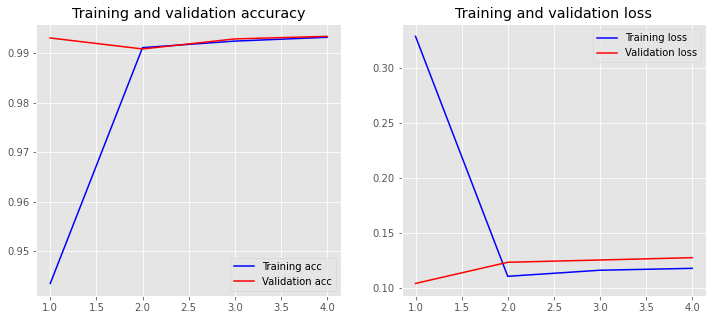

In [25]:
display_model_score(model1,
    [train_ohe, y_train],
    [val_ohe, y_val],
    [test_ohe, y_test],
    B_size)

plot_history(history1)

In [26]:
#Save the model in case you need to run again to save time
#model1.save_weights('./my_model.h')

**Observations**

The light Resnet consistently gives good accuracy in all datasets. However, it is quite a big model and memory intensive which limits what I can do here. Big model also risks overfitting to the training data. We also have to remember and this "good accuracy" is only in subset of the data.

Let's see how the model accuracy in test set behaves as the function of pfam size in train. Note! Using accuracy defined as (number of correct predictions)/(total number of samples in class) ie. ignoring true negatives.

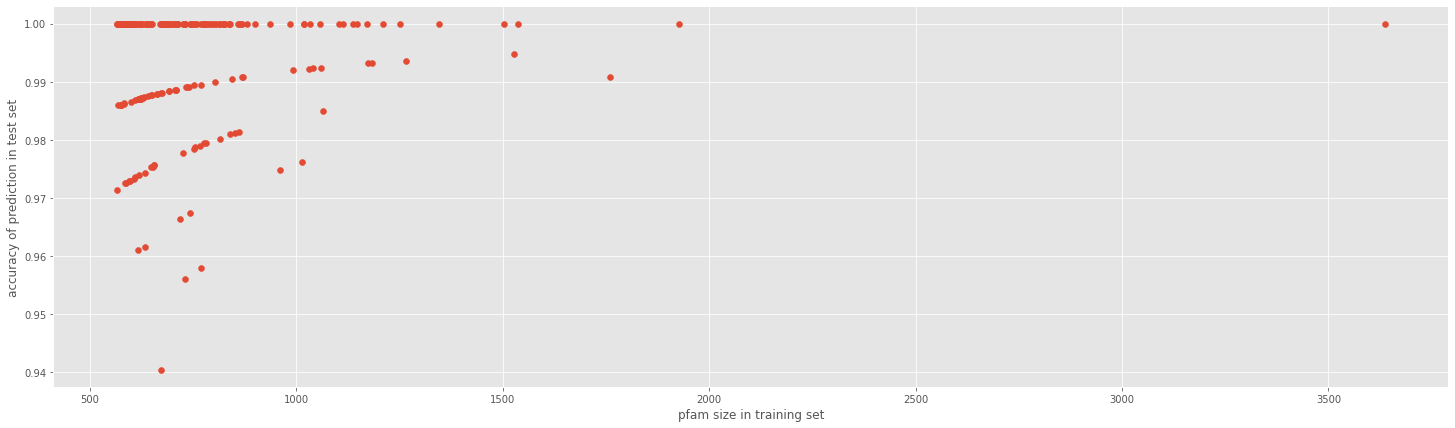

In [27]:
gc.collect()
"the argmax reverses the one hot encoding, the inverse transform finds the labels"
preds = le.inverse_transform(np.argmax(model1.predict(test_ohe), axis=1))

"if you cleaned these from memory above, uncomment to download here again"
df_test = read_data('test')
df_train = read_data('train')

labels=df_train.family_accession.value_counts()[N_begin:N_end]
mask = df_test.family_accession.isin(labels.index.values)
test_part = df_test.loc[mask,:]

from sklearn.metrics import confusion_matrix
"confusion matrix is a handy but opaque way of extracting the class accuracies"
cm = confusion_matrix(test_part.family_accession, preds,  labels=labels.index.values, normalize='true')
acc=cm.diagonal()
plt.figure(figsize=(25, 7))    
plt.scatter(labels[:], acc)
plt.xlabel("pfam size in training set")
plt.ylabel("accuracy of prediction in test set")
plt.show()

The scatter plot of preduction accuracy within pfam vs the pfam size shows that in general accuracy increases with the pfam size in the training set. This is to be expected. The number of datapoints at 1 could indicate some overfitting/data leakage but since these are pfam-vise (and not the total) accuracies, and there are pfams with much less accurate results, I am not too concerned yet.

However, the plot seems to form pequiliar lines as function of increasing plot size? Is this related to what the model learns? Do the pfams in the lines belong to similar superfamily? A freak numerical accident? Coding error? I did reproduce the same result using two different methods for extracting the accuracies.


Let's zoom into one of the lines:

[0.99324324 0.99242424 0.99230769 0.9921875  0.99193548 0.99074074
 0.99074074 0.99047619 0.99       0.98947368 0.9893617  0.98913043
 0.98901099 0.98901099 0.98863636 0.98863636 0.98863636 0.98837209
 0.98837209 0.98809524 0.98809524 0.98780488 0.98780488 0.98765432
 0.98765432 0.9875     0.98734177 0.98717949 0.98717949 0.98701299
 0.98717949 0.98701299 0.98701299 0.98701299 0.98701299 0.98701299
 0.98684211 0.98648649 0.98630137 0.98611111 0.98591549 0.98591549
 0.98591549 0.98591549 0.98591549]
[1185 1061 1042 1032  992  871  870  845  804  769  753  740  736  734
  710  709  708  693  692  675  674  663  663  650  649  641  632  630
  625  625  624  621  621  620  620  617  609  600  584  583  577  577
  576  575  568]


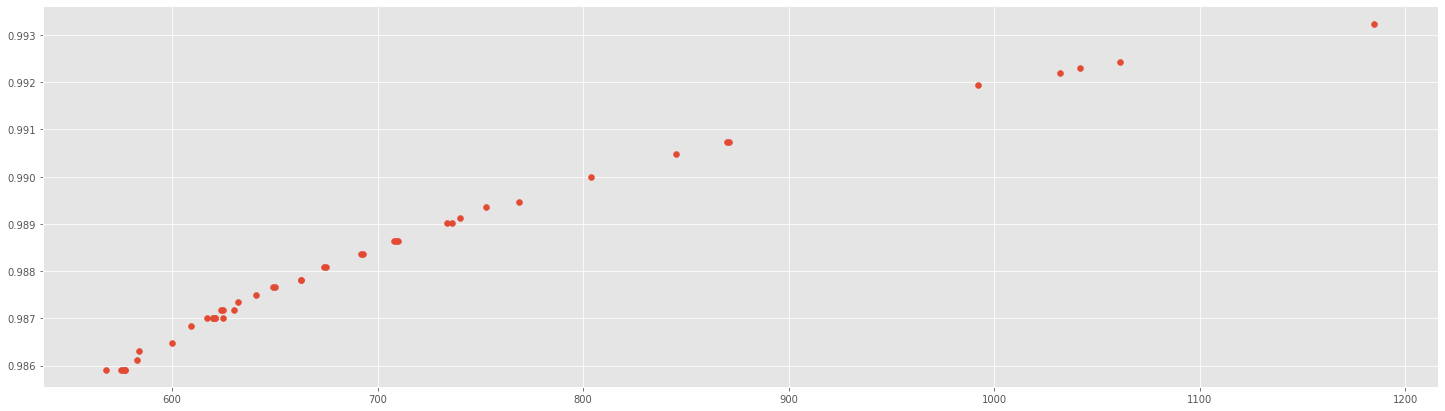

['PF02881.19' 'PF02545.14' 'PF03453.17' 'PF01799.20' 'PF05192.18'
 'PF03462.18' 'PF13692.6' 'PF13439.6' 'PF02844.15' 'PF01641.18'
 'PF02021.17' 'PF07479.14' 'PF00920.21' 'PF01330.21' 'PF13288.6'
 'PF02033.18' 'PF02739.16' 'PF04264.13' 'PF02686.15' 'PF01252.18'
 'PF00365.20' 'PF02424.15' 'PF08459.11' 'PF02325.17' 'PF10397.9'
 'PF02367.17' 'PF02771.16' 'PF00358.20' 'PF11838.8' 'PF01379.20'
 'PF01055.26' 'PF17768.1' 'PF00003.22' 'PF13517.6' 'PF01424.22'
 'PF00926.19' 'PF01975.17' 'PF10996.8' 'PF03705.15' 'PF14693.6'
 'PF07971.12' 'PF02508.14' 'PF00886.19' 'PF01628.21' 'PF00885.19']
(array([ 10,  18,  20,  22,  26,  32,  33,  40,  53,  69,  75,  82,  83,
        84,  97,  98, 100, 104, 106, 118, 119, 124, 125, 130, 132, 137,
       143, 145, 147, 148, 150, 152, 153, 156, 157, 160, 166, 177, 205,
       207, 209, 211, 212, 215, 220]),)


63                   B5
109                  B5
118             UPF0016
133                 RRF
168                 RRF
247      Ribosomal_L21p
249     Phe_tRNA-synt_N
296               CBM_1
371                YceI
476       B12-binding_2
518             SRP54_N
556                AIRS
562                SecY
565        Peptidase_A8
660         AAA_assoc_2
663             Nebulin
684                SelR
689             UPF0126
694                ZnuA
762         Flavokinase
766         CPSase_L_D3
781       Ribosomal_L23
786             UPF0126
820               7tm_3
826          ATP-synt_C
844                 R3H
867        DHquinase_II
874       Tyr_Deacylase
906               7tm_3
910                CRCB
918                UvrB
924                 DHH
932     Methyltransf_25
958         THF_DHG_CYH
963      Succ_DH_flav_C
987                PATR
1001             MoeA_N
1038       Ribosomal_S6
1208              PQQ_3
1215      Ribosomal_L22
1220             ADSL_C
1231         Ham

In [28]:
lmask=np.where(np.logical_and(np.logical_and(acc>0.985, acc<0.995) ,np.logical_and(labels.values<1200, labels.values!=1173)))
print(acc[lmask])
print(labels.values[lmask])
plt.figure(figsize=(25, 7))    
plt.scatter(labels.values[lmask], acc[lmask])
plt.show()

print(labels.index.values[lmask])
print(lmask)
test_part['family_id'].iloc[lmask]

Nothing jumps out immediately after extracting the one of the "arcs" from the plot.

It would be fun to correlate these with the similarity measure (sequence identity) used in the Bileschi et al paper, but running distance calculations on a notebook is a bit unfeasible. The example code below calculates the similarity of 6000 aligned sequences in the test to the data in train and it takes around ~1h. Using custom measure can kill the computational performance of cdist.

In [29]:
"""
def similarity(a,b):
    #this function calculates the metric for sequence similarity
    min_l=min(len(a), len(b))
    return sum(s1 == s2 and s1!='.' for s1, s2 in zip(a[:min_l], b[:min_l]))/min_l

print(len(test_part['aligned_sequence'].values))

#calculating distances between all of train and partial test set, set here to 6000 first sequences
x_train=np.asarray(train_part['aligned_sequence'].values, dtype=object)
x_test=np.asarray(train_part['aligned_sequence'].values[:6000], dtype=object)
b=time.time()
matrix = cdist(x_test.reshape(-1, 1), x_train.reshape(-1, 1), lambda x, y: similarity(x,y))


e=time.time()
print(e-b)
"""

"\ndef similarity(a,b):\n    #this function calculates the metric for sequence similarity\n    min_l=min(len(a), len(b))\n    return sum(s1 == s2 and s1!='.' for s1, s2 in zip(a[:min_l], b[:min_l]))/min_l\n\nprint(len(test_part['aligned_sequence'].values))\n\n#calculating distances between all of train and partial test set, set here to 6000 first sequences\nx_train=np.asarray(train_part['aligned_sequence'].values, dtype=object)\nx_test=np.asarray(train_part['aligned_sequence'].values[:6000], dtype=object)\nb=time.time()\nmatrix = cdist(x_test.reshape(-1, 1), x_train.reshape(-1, 1), lambda x, y: similarity(x,y))\n\n\ne=time.time()\nprint(e-b)\n"

Let us correlate the accuracies with the 1) the average sequence lenght and 2) the variance of sequence lenght in the pfams instead. Maybe this will mimic information content of the sequences in pfams?

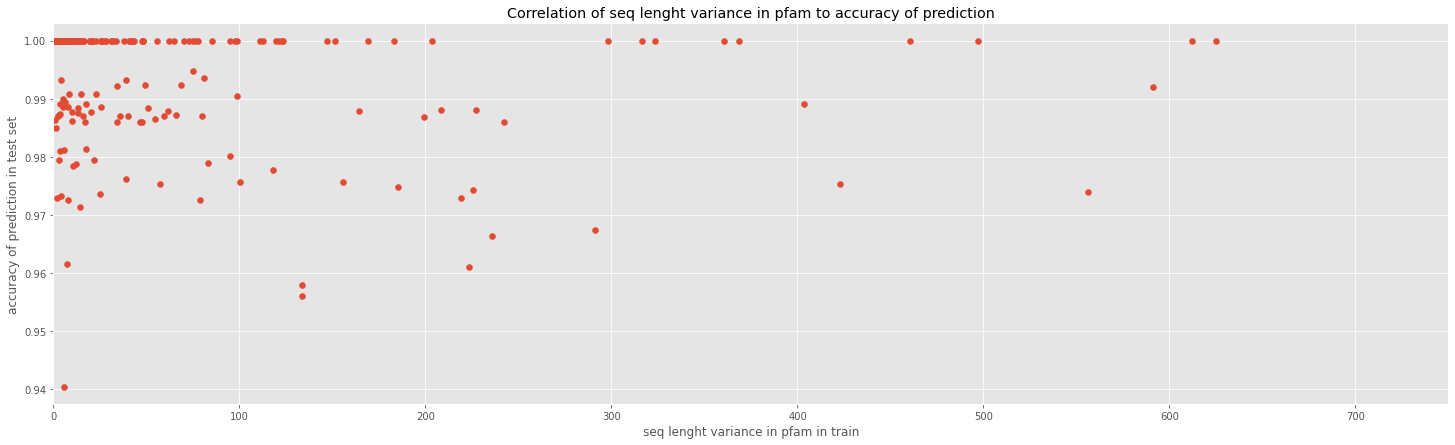

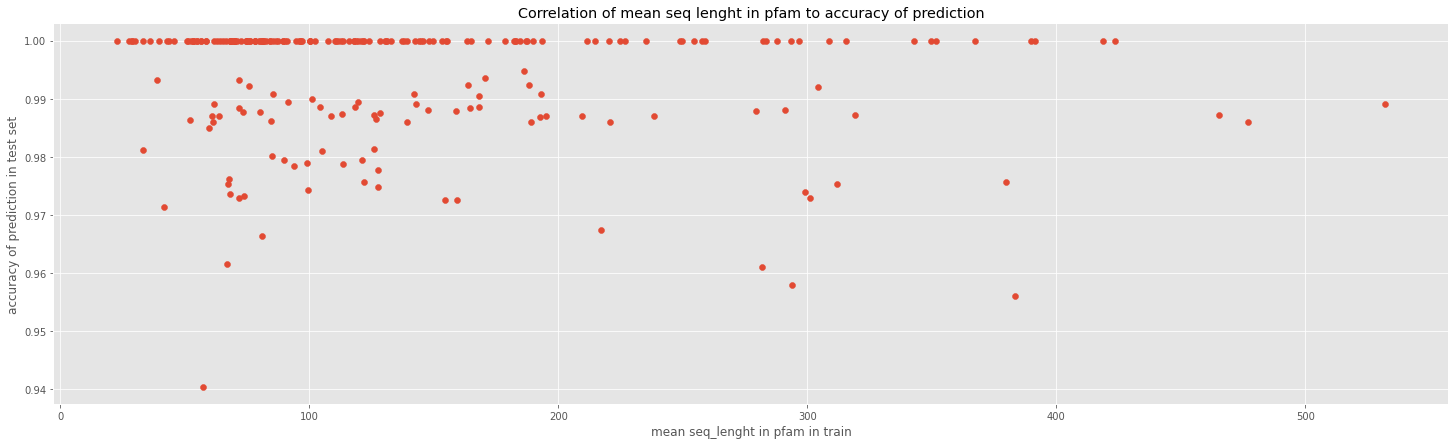

maximun values in each column:
 family_accession      PF17921.1
seq_l_mean           531.951087
seq_l_var           12959.31483
acc                         1.0
dtype: object


In [30]:
train_part['seq_length']  = train_part['sequence'].str.len()

foo=train_part.groupby('family_accession')['seq_length'].agg(["mean", "var"])
#reordering the mean and variance seq leghts to the same order as the accuracy data
foo=foo.loc[labels.index.values[:],:]

acc_df=pd.DataFrame(labels.index.values, columns=['family_accession'])

#creating a new dataframe
acc_df['seq_l_mean'] = foo['mean'].values
acc_df['seq_l_var'] = foo['var'].values
acc_df['acc']=acc

#plotting that dataframe

plt.figure(figsize=(25, 7))    
plt.scatter(acc_df['seq_l_var'], acc_df['acc'])
plt.title("Correlation of seq lenght variance in pfam to accuracy of prediction")
plt.xlabel("seq lenght variance in pfam in train")
plt.ylabel("accuracy of prediction in test set")
#set x axis limit here for zoom
plt.xlim(0, 750)
plt.show()


plt.figure(figsize=(25, 7))    
plt.scatter(acc_df['seq_l_mean'], acc_df['acc'])
plt.title("Correlation of mean seq lenght in pfam to accuracy of prediction")
plt.xlabel("mean seq_lenght in pfam in train")
plt.ylabel("accuracy of prediction in test set")
#set x axis limit here for zoom
plt.show()

print("maximun values in each column:\n",acc_df.max())

The per-pfam averaged sequence lenght and sequence length variance show at most a weak correlation with the prediction accuracy of the pfam, with more variance and longer average length being beneficial.

There does seem to be one pfam with a very high variance. Let us see which it is

In [31]:
print(acc_df.loc[acc_df['seq_l_var']>10000])

ls=train_part.loc[train_part['family_accession']=='PF01384.20']['seq_length'].values
print(np.mean(ls), np.var(ls))


   family_accession  seq_l_mean    seq_l_var  acc
79       PF01384.20  423.495302  12959.31483  1.0
423.4953020134228 12941.919776586641


Doesn't seem that anything is out of order, just an unusually flat distribution.

Finally, I tested how the model handles different size ranges using the code block below. The results are:

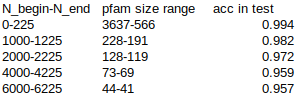

which show an expected deteriation with pham decreasing pfam in training. However, even for the smallest sizes the neural network does surprisingly well which indicates that networks could predict a range of sizes if present in training data or multiple networks with some kind of transfer learning might also work,

Number of classes 225
Unique pfams in Train 225, data coverage in Train 0.157056, number of training samples 170679
Unique pfams in Val 225, data coverage in Val 0.168097 
Unique pfams in Test 225
The largest considered pfam size is 3637
The smallest considered pfam size is 566
(170679, 225) (21209, 225) (21209, 225)
(170679, 225, 21) (21209, 225, 21) (21209, 225, 21)
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 225, 21)]    0                                            
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 225, 32)      704         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalizatio

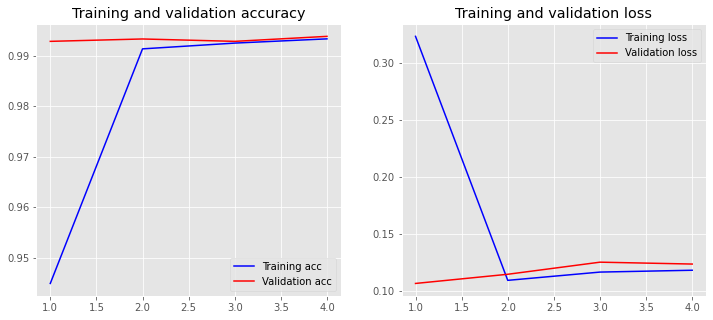

In [32]:
"This block reruns the whole training, handy for testing different set ranges"
N_begin=0
N_end=225

"if you cleaned these from memory above, uncomment to download here again"
df_test = read_data('test')
df_train = read_data('train')
df_val=read_data('dev')

"If you need, uncomment to clean the old model from memory"
#del model1
#gc.collec()

train_part, val_part, test_part, N_classes=grab_classrange(df_train, df_val, df_test, N_begin, N_end)

seq_max_l = 225
padtype='post'
trunctype='post'

train_encd = int_encoding(train_part) 
val_encd = int_encoding(val_part) 
test_encd = int_encoding(test_part) 

train_pad = pad_sequences(train_encd, maxlen=seq_max_l, padding=padtype, truncating=trunctype)
val_pad = pad_sequences(val_encd, maxlen=seq_max_l, padding=padtype, truncating=trunctype)
test_pad = pad_sequences(test_encd, maxlen=seq_max_l, padding=padtype, truncating=trunctype)

print(train_pad.shape, val_pad.shape, test_pad.shape)


train_ohe = to_categorical(train_pad)
val_ohe = to_categorical(val_pad)
test_ohe = to_categorical(test_pad)

print(train_ohe.shape, val_ohe.shape, test_ohe.shape) 


y_train_le = le.fit_transform(train_part['family_accession'])
y_val_le = le.transform(val_part['family_accession'])
y_test_le = le.transform(test_part['family_accession'])

y_train_le.shape, y_val_le.shape, y_test_le.shape

y_train = to_categorical(y_train_le)
y_val = to_categorical(y_val_le)
y_test = to_categorical(y_test_le)

y_train.shape, y_val.shape, y_test.shape

model1=create_resnet(seq_max_l, 2, 0.35, N_classes, 21)
model1.summary()

es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

N_epoch=30
B_size=75


history1 = model1.fit(
    train_ohe, y_train,
    epochs=N_epoch, batch_size=B_size,
    validation_data=(val_ohe, y_val),
    callbacks=[es]
    )

display_model_score(model1,
    [train_ohe, y_train],
    [val_ohe, y_val],
    [test_ohe, y_test],
    B_size)

plot_history(history1)

# Epilogue (for fun): 1nn with Levenshtein ratio?

To compare, it would be fun see how predicting the pfam for by picking the closest with respect to the Levenshtein ratio on the training set does. Essentially a k-nearest neighbour where only one --- the nearest---neighbor is considered. 
Levenshtein distance (more info here: https://en.wikipedia.org/wiki/Levenshtein_distance) is a distance metric calculating the similarity of strings as edits needed to convert a string to another and hence could be usable also with amino acids. Levenshtein ratio is the string-lenght normalized version of this.


The pre-requisite for knn methods is that the samples cluster somewhat with the distance metric.


However, as we learnt above, doing distance calculations with custom metrics in data sets of this size is unfeasible on a python notebook. I tested the Lehvenshtein distance to be ~3 times the computational cost of the similarity measure above. Concerning CPU time, a neural network seems to be the considerably more effective choice.

Instead of usual skilearn I did a quick and dirty implementation of 1nn using fuzzywuzzy below, it can only test a limited amount of samples but gives prediction accuracies over ~0.95 for most pfam size ranges which is surprisingly good. That number is a guestimate, though, owing to the limited amount of sequences tested.



In [33]:
import Levenshtein
import time
from fuzzywuzzy import fuzz, process

def downsample_test(df):
    
    """This is a function to reduce the bias on how test samples are selected. 
    Without downsampling to the size of smallest fpam it is likely to choose test samples 
    from the more common pfams giving too good of an estimate for accuracy"""
    Nsample=df.family_accession.value_counts()[-1]
   
    test_ds = df.groupby('family_accession', group_keys=False).apply(lambda x: x.sample(Nsample))
    test_ds = test_ds.sample(frac=1).reset_index(drop=True)
    return test_ds
    
def simple_lev1NN(train_part, test_part, N_lim):
    
    x_train=train_part['sequence'].values
    x_test=test_part['sequence'].values
    xtrain_dict = {idx: el for idx, el in enumerate(x_train)}
    
    score=0
    
    for index, row in enumerate(x_test[:N_lim]):
        result=process.extractOne(row, xtrain_dict, scorer=fuzz.ratio)
 
        if train_part['family_accession'].values[result[2]]==test_part['family_accession'].values[index]:
            score=score+1
         
    return score

b=time.time()
#tune the number of tested samples here
Ntested=150
test_ds=downsample_test(test_part)

score=simple_lev1NN(train_part, test_ds, Ntested)
e=time.time()
print("1nn \"accuracy\"", score/Ntested)
print("Time consumed", e-b)




1nn "accuracy" 1.0
Time consumed 226.50358700752258


# Summary
* Due to the huge amount of pfams, and the presence of pfams with only few samples, I made a network to classify 225 most common pfams only
* The network design was inspired by Bileshi et al
* Resnet perform classification tasks accurately. The method is memory intensive but computationally quite effective compared to eg. knn, largely thanks to the fast convergence in training. 
* Performance deteriorates when pfam sample size is reduced, as espected. However, when retrained using same parameters,  networks still give >0.95 accuracy even for surprisingly small classes (~40 samples in train). This implies that transfer learning, eg, by freezing the network core, might be feasible. One might also consider ensemble methods where one method specializes for smaller classes, or ensemble of networks like in the Bileschi et al paper.
* Scatter plot of pfam size vs accuracy shows weird, arc-like datapoint families. Root cause was not found, but is perhaps related to some core property that connects these families...or a numerical misshap.